## Hypothesis tests and z-scores

Hypothesis testing use case:

***Determine whether sample statistics are close to or far away from expected (of hypothesized) values***

In [1]:
import pandas as pd

stack_overflow = pd.read_feather('./data/stack_overflow.feather')
print(stack_overflow.info())
mean_comp_samp = stack_overflow['converted_comp'].mean()  # point estimate of compensation
print(mean_comp_samp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   respondent                         2261 non-null   float64 
 1   main_branch                        2261 non-null   object  
 2   hobbyist                           2261 non-null   object  
 3   age                                2261 non-null   float64 
 4   age_1st_code                       2261 non-null   float64 
 5   age_first_code_cut                 2261 non-null   object  
 6   comp_freq                          2261 non-null   object  
 7   comp_total                         2261 non-null   float64 
 8   converted_comp                     2261 non-null   float64 
 9   country                            2261 non-null   object  
 10  currency_desc                      2261 non-null   object  
 11  currency_symbol                    2261 non

In [2]:
stack_overflow["age_first_code_cut"].value_counts()

age_first_code_cut
adult    1376
child     885
Name: count, dtype: int64

In [3]:
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


### Stack Overflow salary data

Research question:  ***Is this mean Data Science salary significantly different than $110k?***

1. generate a boostrap distribution
2. compute the standard error of this distribution
3. compute the z-score from the standard error
4. determine where this z-score falls in the z-score distribution relative to confidence limits

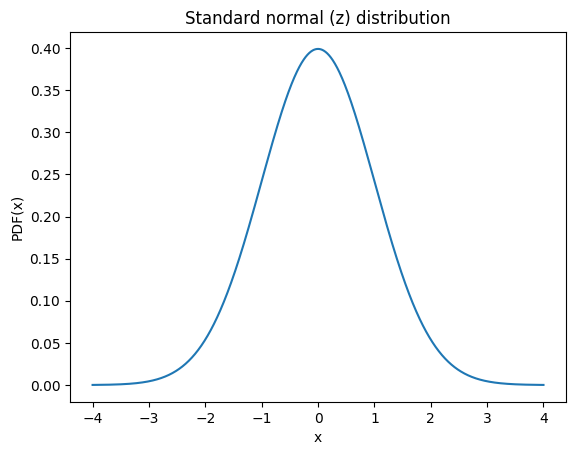

In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Standard normal (z) distribution
x = []
pdf_z = []
for i in np.linspace(-4, 4, 1000):
    x.append(i)
    pdf_z.append(norm.pdf(i))

fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("PDF(x)")
ax.set_title("Standard normal (z) distribution")
ax.plot(x, pdf_z)
plt.show()

In [5]:
def get_bootstrap_dist(df_sample, sample_col, resample_rate=5000):
    """
    Computes a boostrap distribution from a column in a dataframe

    Args:
      df_sample (Dataframe): pandas dataframe which has a numeric column named sample_col
      sample_col (str): name of the column in df_sample to calculate the bootstrap from
      resample_rate (int): number of resamples (with replacement) generated to build bootstrap distribution
    """
    boot_distrib = []
    for i in range(resample_rate):
        boot_distrib.append(
            # cacluate point estimate
            np.mean(
                # resample
                df_sample.sample(frac=1, replace=True)[sample_col]
            )
        )

    return(boot_distrib)

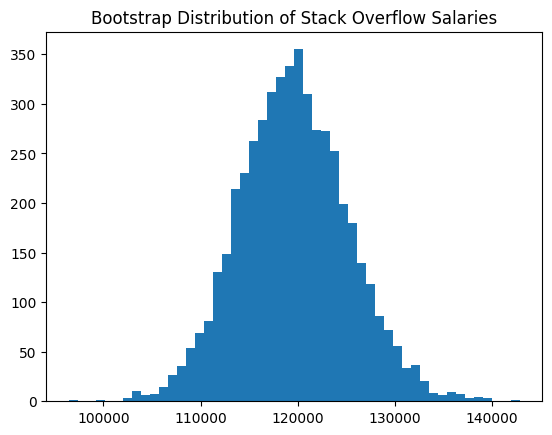

In [6]:
so_boot_distrib = get_bootstrap_dist(stack_overflow, "converted_comp")

# visualize boostrap dist
fig, ax = plt.subplots()
ax.hist(so_boot_distrib, bins=50)
ax.set_title("Bootstrap Distribution of Stack Overflow Salaries")
plt.show()

In [7]:
std_error = np.std(so_boot_distrib, ddof=1)
print(f"standard error of the boostrap distibution of SO salaries: {std_error}")

standard error of the boostrap distibution of SO salaries: 5608.621033493362


## z-scores

Before we can test hypotheses, we need to *standardize* our values.

$\Large\text{standardized value} = \frac{\text{value - mean}}{\text{standard deviation}}$

More generally:

$\Large\text{z} = \frac{\text{sample statistic - hypothetical parameter value}}{\text{standard error}}$

Intuitively, we can see that:
+ the closer the absolute value of this number is to zero, the **less likely** that the mean and the hypothesized value are significantly different.
+ the larger the absolute value of this number is, the **more likely** that the mean and the hypothsized value are significantly different.



In [8]:
# from our previous example
mean_comp_hyp = 110000  # our original hypothesized value
z_score_so_salaries = (mean_comp_samp - mean_comp_hyp) / std_error
print(f"z-score for SO salaries having hypothesized value of 110k: {z_score_so_salaries}")
print("What does this number suggest regarding our hypothesis?")

z-score for SO salaries having hypothesized value of 110k: 1.7071428653338439
What does this number suggest regarding our hypothesis?


## Calculating the sample mean

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

We'll begin our analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In [9]:
late_shipments = pd.read_feather('./data/late_shipments.feather')
print(f"shape of late shipments data: {late_shipments.shape}\n")  # (1000, 27)
print(f"columns in the late shipments data: {late_shipments.columns}\n")
are_late = late_shipments["late"].value_counts()
n_yes = are_late['Yes']
n_no = are_late['No']
print(are_late)

shape of late shipments data: (1000, 27)

columns in the late shipments data: Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

late
No     939
Yes     61
Name: count, dtype: int64


In [10]:
# calc the proportion of late shipments
late_prop_samp = (late_shipments["late"] == 'Yes').mean()

print(f"proportion of shipments that are late: {late_prop_samp}")

proportion of shipments that are late: 0.061


## Calculating a z-score

Since variables have arbitrary ranges and units, we need to ***standardize*** them as mentioned earlier. For example, a hypothesis test using salaries data that gave different answers if the variables were in **Euros** instead of **US dollars** would be of little value. Standardization avoids this issue.

One standardized value of interest in a hypothesis test is called a **z-score**. To calculate it, we need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

In [11]:
# create the bootstrap distribution for the proportion of late shipments
late_shipments["late_binary"] = late_shipments["late"] == "Yes"
late_shipments["late_binary"] = late_shipments["late_binary"].astype(int)
late_shipments_boot_distn = get_bootstrap_dist(late_shipments, "late_binary")
print(f"number samples in bootstrap distribution: {len(late_shipments_boot_distn)}")
print(f"first few samples of bootstrap distribution: {late_shipments_boot_distn[:5]}")

number samples in bootstrap distribution: 5000
first few samples of bootstrap distribution: [0.068, 0.063, 0.053, 0.052, 0.059]


In [12]:
# hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# calc standard error
std_error = np.std(late_shipments_boot_distn)

# calc z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

print(f"std error: {std_error} | z-score: {z_score}")  # 0.1335510751060483 listed on platform, pretty close

std error: 0.007580422953899078 | z-score: 0.13191876048098866


## p-values

$H_0:$ The proportion of data scientists starting programming as children is 35%  
$H_A:$ The proportion of data scientists starting programming as children is greater than 35% (right tail test)

In [13]:
stack_overflow["age_1st_cut_binary"] = stack_overflow["age_first_code_cut"] == "child"
stack_overflow["age_1st_cut_binary"] = stack_overflow["age_1st_cut_binary"].astype(int)
# create bootstrap dist of age_first_code_cut and visualize
first_code_boot_distn = get_bootstrap_dist(stack_overflow, "age_1st_cut_binary")

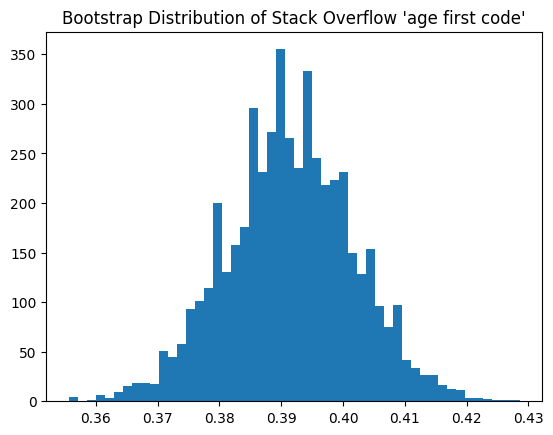

In [14]:
# visualize bootstrap distribution
fig, ax = plt.subplots()
ax.hist(first_code_boot_distn, bins=50)
ax.set_title("Bootstrap Distribution of Stack Overflow 'age first code'")
plt.show()

In [15]:
# calc z-score - start with the mean
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean() 
# hypothesized value
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
print(f"sample mean: {prop_child_samp} | std error: {std_error} | z-score: {z_score}")

sample mean: 0.39141972578505085 | std error: 0.010271599133667026 | z-score: 4.032451543916879


## Late shipments

In [16]:
# calc p-value for prior example
late_prop_hyp = 0.060

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.46122191258069833


## Statistical significance

+ p-values quantify evidence for the null hypothesis
+ Large p-value → fail to reject null hypothesis
+ Small p-value → reject null hypothesis
+ Where is the cutoff point? → **significance level** ($\alpha$), theshold point for "*beyond a reasonable doubt*"
+ Most common value for $\alpha$ is `0.05`, but `0.1`, `0.2` and `0.01` are not uncommon
+ If $p \leq \alpha, \text{reject } H_0 \text{, else fail to reject } H_0$
+ $\alpha$ needs to be set **prior** to conducting the hypothesis test
+ Define ***confidence interval*** as $1 - \alpha$

### Example

$H_0$: Proportion of coders starting as children = 0.35  
$H_A$: Proportion of coders starting as children > 0.35  

In [17]:
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

print(f"Testing sample mean: {prop_child_samp} vs. hyp. mean: {prop_child_hyp}")
print(f"std error: {std_error} | z-score: {z_score} | p_value: {p_value}")

if p_value <= alpha:
    print(f"reject H0 because p_value of {p_value} is <= alpha of {alpha}")
else:
    print(f"accept H0 because p_value of {p_value} is > alpha of {alpha}")
   

Testing sample mean: 0.39141972578505085 vs. hyp. mean: 0.35
std error: 0.010271599133667026 | z-score: 4.032451543916879 | p_value: 2.759899940540933e-05
reject H0 because p_value of 2.759899940540933e-05 is <= alpha of 0.05


In [18]:
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print(f"{round(100*(1-alpha))}% confidence interval: {(lower, upper)}")

95% confidence interval: (0.3710747456877488, 0.41132242370632466)


## Types of errors (confusion matrix)

<img src="./graphics/types_of_errors.png">

## Performing t-tests

The **t-statistic** is a value used to determine if there is a significant **difference between the means of two groups**, especially when the **sample size is small** or the **population standard deviation is unknown**. It is calculated as the ratio of the difference between an estimated value and a known value to the **standard error** of the estimate.

### Example: Compensation between members of group

*Are users who first programmed as a child compensated higher than those that started as adults?*

$H_0$ : The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult.

$H_0$ : $\mu_{\text{child}} = \mu_{\text{adult}}$&nbsp;&nbsp;&nbsp;&nbsp;or  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mu_{\text{child}} - \mu_{\text{adult}} = 0$

$H_A$ : The mean compensation (in USD) is **greater** for those that coded first as a child and those that coded first as an adult.

$H_A$ : $\mu_{\text{child}} > \mu_{\text{adult}}$&nbsp;&nbsp;&nbsp;&nbsp;or  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mu_{\text{child}} - \mu_{\text{adult}} > 0$

#### Notation

$\mu$ = population mean  
$\bar{x}$ = sample mean

In [19]:
# calculate groupwise summary stats
code_means = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
mean_child = code_means['child']
mean_adult = code_means['adult']
print(f"compensation for 1st code child:  {mean_child}")
print(f"compensation for 1st code adults: {mean_adult}")

compensation for 1st code child:  132419.5706214689
compensation for 1st code adults: 111313.31104651163


### Is this difference significant or can it be explained by sampling variability?

test statistic = $(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}})$

### t-statistic

$$
\begin{align}
\Large\text{t} & = \frac{\text{difference in sample stats - difference in population parameters}}{\text{standard error}} \\[2em]
               & = \frac{(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}}) - (\mu_{\text{child}} - \mu_{\text{adult}})}{\text{standard error}} \\[2em]
               & = \frac{(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}}) - (\mu_{\text{child}} - \mu_{\text{adult}})}{SE(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}})}
\end{align}
$$

### Standard error

The **standard error** is computed differently depending on the test, but for testing the difference between two means from populations of unequal variance, this is called **Welch's t-test** and the $SE$ is the denominatorof the following statistic:

$$
\begin{align}
\Large t = \dfrac{(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}})}{\sqrt{\dfrac{s_{\text{child}}^2}{n_{\text{child}}} + \dfrac{s_{\text{adult}}^2}{n_{\text{adult}}}}}
\end{align}
$$


## Late shipments

### From t to p

In order to make decision about weights relationship to being late, we need to transform the test statistic with a cumulative distribution function to get a p-value.

#### Hypotheses:

$H_0$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_A$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

In [20]:
# weight_kilograms
late_wgt_mean = late_shipments.groupby("late")["weight_kilograms"].mean()
xbar_no = late_wgt_mean["No"]
xbar_yes = late_wgt_mean["Yes"]
late_wgt_std = late_shipments.groupby("late")["weight_kilograms"].std()
s_no = late_wgt_std["No"]
s_yes = late_wgt_std["Yes"]
print(late_wgt_mean)
print(late_wgt_std)

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64
late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64


In [21]:
numerator = xbar_no - xbar_yes
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)
t_stat = numerator / denominator
print(t_stat)

-2.3936661778766433


In [22]:
from scipy.stats import t

alpha = 0.05

# Calculate the degrees of freedom
degrees_of_freedom = n_yes + n_no - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)
print(f"Since p value of {p_value} is < alpha of {alpha}, reject the null hypothsis in favor of the alternative.")

0.008432382146249523
Since p value of 0.008432382146249523 is < alpha of 0.05, reject the null hypothsis in favor of the alternative.


## Paired t-tests

### Research question: Was the percentage of Republican candidate voters lower in 2008 than 2012?

$\Large H_0$ : $\Large \mu_{\text{2008}} - \mu_{\text{2012}} = 0$  
$\Large H_A$ : $\Large \mu_{\text{2008}} - \mu_{\text{2012}} < 0$

+ Set α = 0.05 significance level.
+ Data is **paired** → each voter percentage refers to the same county (not independent)
+ Want to capture voting patterns in model

**Reference:**  
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

In [23]:
alpha = 0.05

df_rep_votes = pd.read_feather("./data/repub_votes_potus_08_12.feather")
df_rep_votes.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


<Axes: >

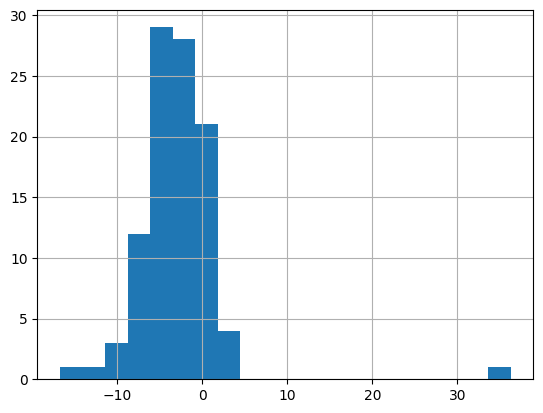

In [24]:
sample_data = df_rep_votes 
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']

sample_data['diff'].hist(bins=20) 

In [25]:
 xbar_diff = sample_data['diff'].mean()
print(f"mean of diff: {xbar_diff}")

mean of diff: -2.877109041242944


## Revised hypotheses

$\Large H_0$ : $\Large \mu_{\text{diff}} = 0$  
$\Large H_A$ : $\Large \mu_{\text{diff}} < 0$  

### Revised test statistic for paired samples:

$$
\begin{align}
\Large t = \dfrac{(\bar{x}_{\text{diff}} - \mu_{\text{diff}})}{\sqrt{\dfrac{s_{\text{diff}}^2}{n_{\text{diff}}}}} \\[1em]
\Large df = n_{\text{diff}} - 1
\end{align}
$$

In [26]:
n_diff = len(sample_data)
s_diff = sample_data['diff'].std()
print(f"n_diff: {n_diff} | s_diff: {s_diff}")

n_diff: 100 | s_diff: 5.136737887231852


In [27]:
t_stat = (xbar_diff-0) / np.sqrt(s_diff**2/n_diff)
degrees_of_freedom = n_diff - 1
p_value = t.cdf(t_stat, df=degrees_of_freedom)
print(f"t_stat: {t_stat} | degrees_of_freedom: {degrees_of_freedom} | p_value: {p_value}")
print(f"Since p value of {p_value} is < alpha of {alpha}, reject the null hypothsis in favor of the alternative.")

t_stat: -5.601043121928489 | degrees_of_freedom: 99 | p_value: 9.572537285272411e-08
Since p value of 9.572537285272411e-08 is < alpha of 0.05, reject the null hypothsis in favor of the alternative.


In [28]:
# easier way...
import pingouin

pingouin.ttest(
    x=sample_data['diff'],
    y=0,
    alternative="less"  # left tail
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


In [30]:
# paired t-test - results in first 4 col's are the same
pingouin.ttest(
    x=sample_data['repub_percent_08'],
    y=sample_data['repub_percent_12'],
    paired=True,
    alternative="less"  # left tail
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [31]:
pingouin.ttest(
    x=sample_data['repub_percent_08'],
    y=sample_data['repub_percent_12'],
    paired=False,  # notice how p-value increased
    alternative="less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972
